<a href="https://colab.research.google.com/github/taroshg/k-means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import numpy as np
import matplotlib.pyplot as plt

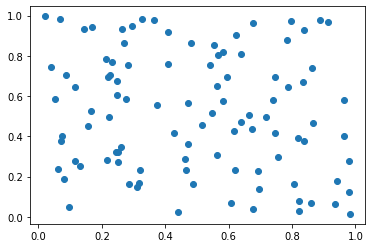

In [203]:
# Generate Data
N_EXAMPLES = 100
N_DIMS = 2 # x1 and x2 (for visualization)

X = np.random.rand(N_EXAMPLES, N_DIMS)

# Show Data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [212]:
N_CLUSTERS = 2
X_cluster = np.zeros((N_EXAMPLES,)) # assigned clusters for x's
C = np.zeros((N_CLUSTERS, N_DIMS)) # clusters with their positions

# initalize cluster positions
for i in range(N_CLUSTERS):
    random_x = np.random.randint(N_EXAMPLES)
    C[i] = X[random_x, :]

In [213]:
def display(X, X_cluster, C):
    for c in range(N_CLUSTERS):
        data = X[X_cluster == c]
        plot = plt.scatter(data[:, 0], data[:, 1])
        plt.scatter(C[c, 0], C[c, 1], s=200, marker='v', c=plot.get_facecolor())
    plt.show()

In [214]:
def get_closest_cluster(x, C):
    closest_cluster = 0
    closest_distance = np.inf # initalize highest distance

    # loop through each cluster to find closest cluster
    for c in range(N_CLUSTERS):
        dist = np.linalg.norm(x - C[c, :], axis=0) ** 2
        if dist < closest_distance:
            closest_distance = dist
            closest_cluster = c

    return closest_cluster

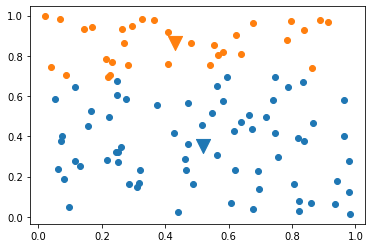

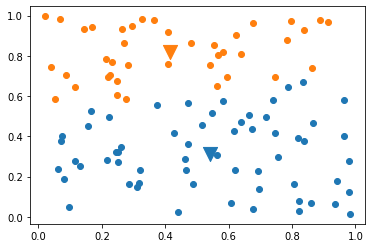

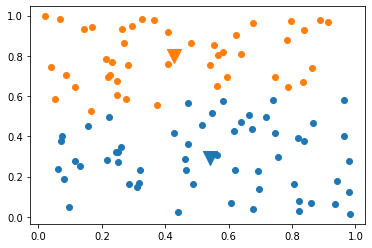

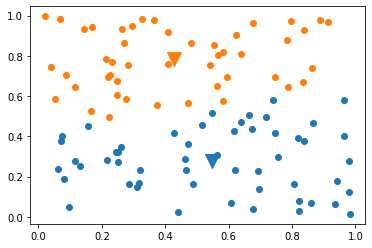

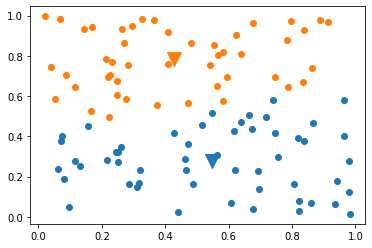

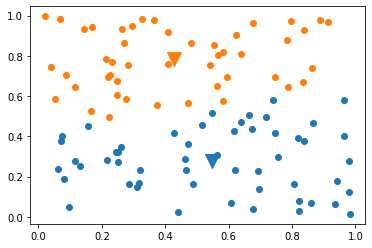

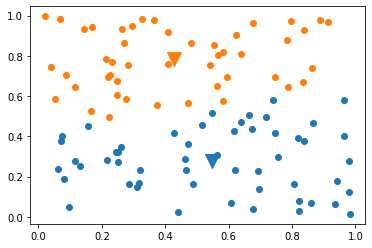

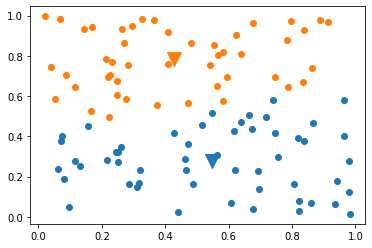

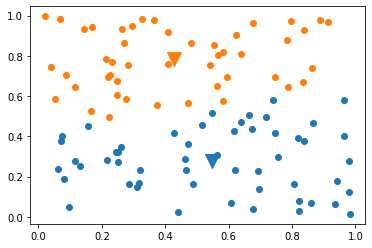

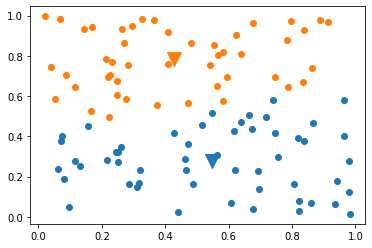

In [215]:
ITERATIONS = 10
for _ in range(ITERATIONS):
    # assign new clusters for each x
    for i in range(N_EXAMPLES):
        X_cluster[i] = get_closest_cluster(X[i, :], C)

    # update cluster position
    for c in range(N_CLUSTERS):
        data = X[X_cluster == c] # all data that belongs to current cluster
        C[c, :] = np.mean(data, axis=0) # average positon of all data

    display(X, X_cluster, C)